In [2]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt 
import numpy as np

dict_keys(['0.05_4096-4096-4096', '0.0001_1024-1024-1024_32x32', '0.01_4096-4096-4096', '0.001_4096-4096-4096', '0.005_2048-2048-2048', '0.005_8192-8192-8192', '0.001_1024-1024-1024', '0.005_1024-1024-1024', '0.05_1024-1024-1024', '0.01_8192-8192-8192', '0.01_2048-2048-2048', '0.05_8192-8192-8192', '0.001_8192-8192-8192', '0.001_2048-2048-2048', '0.05_2048-2048-2048', '0.01_1024-1024-1024', '0.005_4096-4096-4096'])


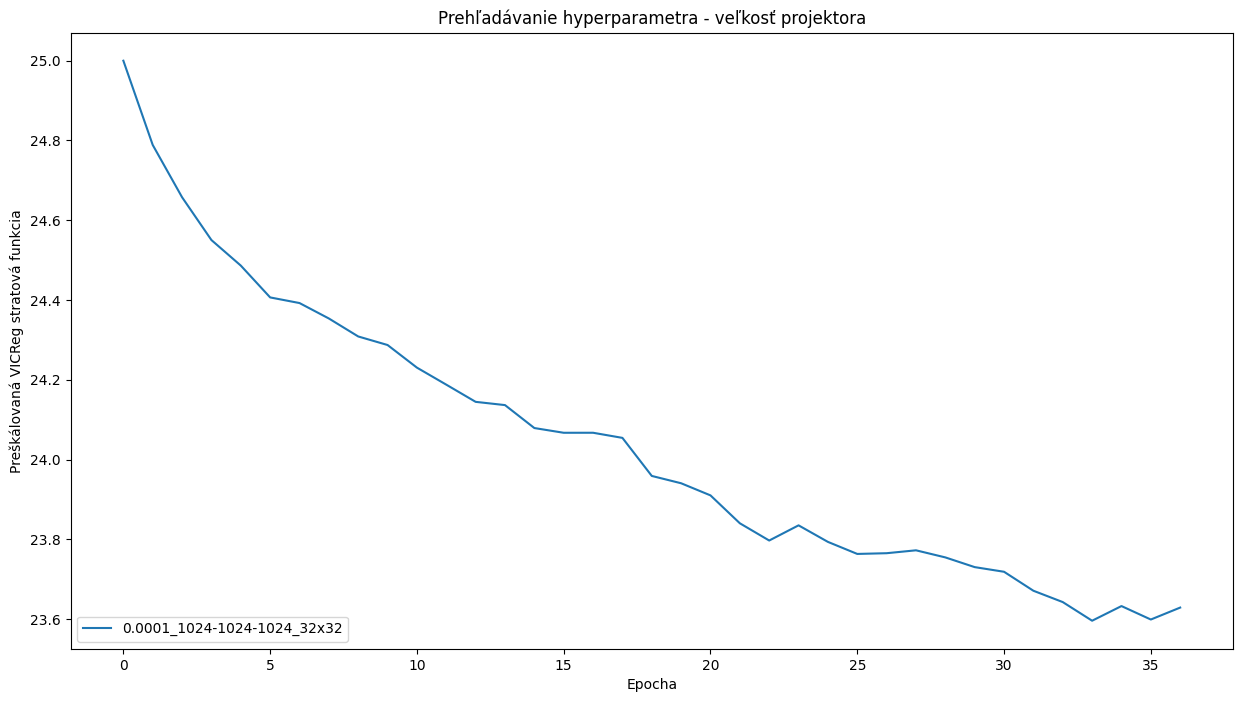

In [10]:
folder = 'pretraining/vit_s/'

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# vit-s grid search
files = os.listdir(folder)

files = [ file for file in files if file[0] == '0']

data = {}
for file in files:
    filename = folder + file + '/stats.txt'
    
    f = open(filename, "r")
    
    list_of_losses = []
    
    df = {
        "epoch":[],
        "loss":[]
    }
    for line in f.readlines():
        
        if 'loss' not in line:
            continue
        
        if line[0] != '{':
            line = line.split('{')[1]
            line = '{' + line
        
        # print(line)
        json_line = json.loads(line)
        
        df['epoch'].append(json_line['epoch'])
        df['loss'].append(json_line['loss'])

        
        # list_of_losses.append(json_line['loss'])
        
    df = pd.DataFrame(df)
    df = df.groupby('epoch').agg({'loss':"mean"})
    list_of_losses = df['loss'].values
        
    file_name = file.split('__')[0]
    data[file_name] = list(list_of_losses)
    
# pd.DataFrame(data)
print(data.keys())
plt.figure(figsize=(15,8))
data = dict(sorted(data.items()))
for training in data:
    
    if '32' in training:
    
        res = data[training]

        result2 = running_mean(res, 5)

        scale = 25 / result2[0]
        result2 = result2*scale



        plt.plot(result2,label=training)

plt.title('Prehľadávanie hyperparametra - veľkosť projektora')
plt.xlabel("Epocha") 
plt.ylabel("Preškálovaná VICReg stratová funkcia")
plt.legend(loc="lower left")
plt.show()
